In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import copy

from os import listdir
from os.path import isfile, join
from pycparser import c_ast, c_parser, plyparser
import clara_wrapper


CLARA <module 'clara' from '/home/milselarch/projects/UROP/claraplus/clara/__init__.py'>


In [2]:
import pathlib
pathlib.Path.cwd()

PosixPath('/home/milselarch/projects/UROP/claraplus')

In [3]:
grader = clara_wrapper.Clara()
midterms = pd.read_csv('./tests/data/midterm_questions_scores.csv')

In [4]:
midterms

,UniqueID,Q3,Q4,Q5,Q6,Q7,Score
0,2018364,10,9,0,15,0,34
1,2018381,6,10,2,17,1,36
2,2018099,10,4,3,3,0,20
3,2018131,10,9,15,6,0,40
4,2018365,10,9,4,2,0,25
...,...,...,...,...,...,...,...
416,2018347,10,10,13,0,0,33
417,2018205,7,3,2,0,1,13
418,2018265,10,10,2,0,0,22
419,2018195,10,10,0,2,1,23


In [5]:
raw_scores = midterms['Q3'].to_numpy()

indices = np.argwhere(~(raw_scores == '--------')).flatten()
# print(indices)
ids = midterms['UniqueID'][indices]
scores = raw_scores[indices]
scores = scores.astype(int)
print(scores)

[10  6 10 10 10 10  7  8 10 10  7  7  3 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10  5 10 10 10 10 10 10 10  8 10 10 10  5 10 10
 10 10 10 10 10  8 10  4  8 10 10 10 10  8 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10  8 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10  8 10 10 10 10 10 10 10 10 10 10 10  7 10 10 10
 10 10 10 10 10 10  6 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  5 10
 10 10 10  9 10  5 10 10  8 10 10 10 10  7  7 10 10 10 10 10 10 10 10 10
 10  6 10 10 10 10 10 10 10 10  7 10 10 10 10 10  2 10 10 10  6 10 10 10
 10 10  8 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10  5  7 10 10 10 10 10 10 10 10 10 10 10 10 10  0 10  0 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10  7 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10  6 10 10 10  7 10 10 10  2 10 10 10  6 10 10 10 10  8
  3 10  3 10 10 10 10 10 10 10 10 10  7 10 10  7 10

In [6]:
perfect_indices = np.argwhere(scores == 10).flatten()
perfect_ids = midterms['UniqueID'][perfect_indices]

full mark percentage: 86.330935%
ppl w/o full marks 57


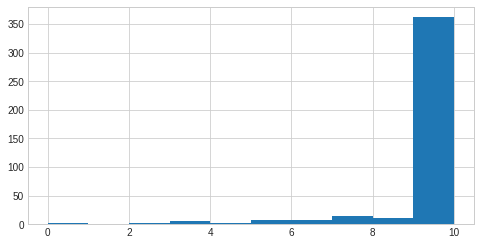

In [7]:
plt.figure(figsize=(8,4))
plt.style.use('seaborn-whitegrid')
plt.hist(scores)

full_marks = len(scores[scores==10])
imperfect_scores = scores[scores != 10]
print(f'full mark percentage: {100 * full_marks / len(scores):2f}%')
print(f'ppl w/o full marks', len(imperfect_scores))

In [8]:
np_ids = np.array(ids)
print(np_ids[:10])

[2018364 2018381 2018099 2018131 2018365 2018053 2018345 2018294 2018036
 2018031]


In [9]:
basedir = './tests/data/midterm/midterm'
submissions = {}
code_files = []
score_map = {}

for k in range(len(np_ids)):
    # print(ids)
    ID = np_ids[k]
    score = scores[k]
    score_map[ID] = score
    
    code_path = f'{basedir}/{ID}/Q3/submission_1/q3_work.py'
    # print(ids[k], code_path)
    
    try:
        code = open(code_path).read()
    except FileNotFoundError:
        code = None
    
    code_files.append(code)
    submissions[ID] = code

In [10]:
print(len(code_files))
print(code_files[0])

417
# MID-TERM EXAM: QUESTION 3

import math

def area_square(s):
    return(s**2)

def vol_frustum(top_area, bottom_area, height):
    ans = top_area + bottom_area + math.sqrt(top_area * bottom_area)
    ans = ans * height
    ans = ans/3
    ans = float(ans)
    
    return (ans)

def get_volume(s1, s2, height):
    a1 = area_square(s1)
    a2 = area_square(s2)
    
    ans = vol_frustum(a1, a2, height)
    ans = float(ans)
    ans = round(ans,3)
    
    return (ans)



In [11]:
print(perfect_ids[0])
print(submissions[perfect_ids[0]])
model_code = submissions[perfect_ids[0]]

2018364
# MID-TERM EXAM: QUESTION 3

import math

def area_square(s):
    return(s**2)

def vol_frustum(top_area, bottom_area, height):
    ans = top_area + bottom_area + math.sqrt(top_area * bottom_area)
    ans = ans * height
    ans = ans/3
    ans = float(ans)
    
    return (ans)

def get_volume(s1, s2, height):
    a1 = area_square(s1)
    a2 = area_square(s2)
    
    ans = vol_frustum(a1, a2, height)
    ans = float(ans)
    ans = round(ans,3)
    
    return (ans)



In [12]:
def computeDeriv(poly):
    result = []
    for e in range(1, len(poly)):
        print(e)
        result.append(float(poly[e]*e))
        
    if result == []:
        return [0.0]  
    else:
        return result

computeDeriv([1,2,3])

1
2


[2.0, 6.0]

In [13]:
def frustum(top_area, bottom_area, height):
    return (height / 3) * (top_area + bottom_area) * math.sqrt(top_area * bottom_area)

In [14]:
input_samples = [[2.4025,4,3], [1.5,6,9], [3.6,6.4,4.0]]
outputs = [frustum(*args) for args in input_samples]
clara_args = input_samples
# clara_args = [input_samples, outputs]
# generate args, expected outputs to feed into clara for Q3
print(clara_args)

[[2.4025, 4, 3], [1.5, 6, 9], [3.6, 6.4, 4.0]]


In [15]:
model_code

'# MID-TERM EXAM: QUESTION 3\n\nimport math\n\ndef area_square(s):\n    return(s**2)\n\ndef vol_frustum(top_area, bottom_area, height):\n    ans = top_area + bottom_area + math.sqrt(top_area * bottom_area)\n    ans = ans * height\n    ans = ans/3\n    ans = float(ans)\n    \n    return (ans)\n\ndef get_volume(s1, s2, height):\n    a1 = area_square(s1)\n    a2 = area_square(s2)\n    \n    ans = vol_frustum(a1, a2, height)\n    ans = float(ans)\n    ans = round(ans,3)\n    \n    return (ans)\n'

In [22]:
from HackedInterpreter import HackedInterpreter

In [23]:
print(clara_args)
print(submissions[ids[1]])

[[2.4025, 4, 3], [1.5, 6, 9], [3.6, 6.4, 4.0]]
# MID-TERM EXAM: QUESTION 3

import math
def area_square(s): #s is side of square
    return s**2

def vol_frustrum(top_area,bottom_area,height):
    ta = top_area
    ba = bottom_area
    h = height
    
    volume = (h/3) *(ta+ba + math.sqrt(ta*ba))
    return volume

def get_volume(s1,s2,height):
    A1 = area_square(s1)
    A2 = area_square(s2)
    vol = vol_fulstrum(A1,A2,height)
    return vol


In [24]:
feedback = grader.feedback(
    [submissions[ids[0]], submissions[ids[2]]], ignoreio=1, entryfnc='vol_frustum',
    args=clara_args, display_feedback=False,
    source_is_file=False, interpreter=HackedInterpreter
)

print(feedback)

<Feedback status=repaired error=None feedback=["Change '$ret := areasq'' to '$ret := Pow(s, 2)' around the beginning of function 'area_square' (cost=3.0)", "Delete 'areasq := Mult(s, s)' at line 6 (cost=3.0)", "Change '$ret := vol'' to '$ret := totalarea'' around the beginning of function 'vol_frustum' (cost=1.0)", "Delete 'vol := Mult(Div(height, 3), totalarea')' at line 11 (cost=5.0)", "Change 'totalarea := Add(Add(top_area, bottom_area), math_sqrt(Mult(top_area, bottom_area)))' to 'totalarea := float(Div(Mult(Add(Add(top_area, bottom_area), math_sqrt(Mult(top_area, bottom_area))), height), 3))' at line 10 (cost=5.0)"] cost=17.0>


In [25]:
# hashes = [hash(code_files[k]) for k in range(len(code_files))]
# distinct_hashes = set(hashes)
# print(distinct_hashes)

In [26]:
"""
# apparently clara cannot handle imports 
working_code_files = [code for code in code_files if code is not None]
# working_code_files.removeall(None)

test = grader.cluster(
    working_code_files, ignoreio=0, entryfnc='vol_frustum',
    args=input_samples, load_existing=False,
    source_is_file=False, interpreter=HackedInterpreter
)
"""

"\n# apparently clara cannot handle imports \nworking_code_files = [code for code in code_files if code is not None]\n# working_code_files.removeall(None)\n\ntest = grader.cluster(\n    working_code_files, ignoreio=0, entryfnc='vol_frustum',\n    args=input_samples, load_existing=False,\n    source_is_file=False, interpreter=HackedInterpreter\n)\n"

In [27]:
print(len(ids))

417


In [42]:
# for mapping student IDs to clara repair costs
costs = {}
# keep track of which student IDs have failed submissions
fails = []

for k in range(len(ids)):
    print(f'PROGRESS {k}/{len(samples)}')
    
    try:
        ID = ids[k]
    except KeyError:
        costs[ID] = -1
        fails.append(ID)
        continue
    
    code = submissions[ID]
    
    sources = [code, model_code]
    print('GRADING', ID)
    cost = -1
    
    if code is None:
        # costs[ID] = -1
        fails.append(ID)
        continue
        
    code = 'import math\n' + code
    code = code.replace('sqrt', 'math.sqrt')
    
    try:
        feedback = grader.feedback(
            sources, ignoreio=1, entryfnc='vol_frustum',
            args=clara_args, display_feedback=False,
            source_is_file=False, interpreter=HackedInterpreter
        )
        
        cost = feedback.cost
        costs[ID] = cost
    
        
    except clara_wrapper.ParseError as e:
        # print('PARSE ERROR')
        fails.append(ID)
        # costs[ID] = -1
        continue
        
    except KeyError as e:
        # print('PARSE ERROR')
        fails.append(ID)
        # costs[ID] = -1
        continue
    
    except Exception as e:        
        if str(e) == 'struct':
            print('STRUCT ERROR')
        else:
            costs[ID] = cost
            fails.append(ID)
            continue

    try:
        del feedback
    except NameError as e:
        pass
        
    print(f'COST {ID} {cost}')


PROGRESS 0/417
GRADING 2018364
COST 2018364 0
PROGRESS 1/417
GRADING 2018381
STRUCT ERROR
COST 2018381 -1
PROGRESS 2/417
GRADING 2018099
COST 2018099 13.0
PROGRESS 3/417
GRADING 2018131
COST 2018131 4.0
PROGRESS 4/417
GRADING 2018365
COST 2018365 4.0
PROGRESS 5/417
GRADING 2018053


Error: struct

Error: struct



COST 2018053 4.0
PROGRESS 6/417
GRADING 2018345
PROGRESS 7/417
GRADING 2018294
STRUCT ERROR
COST 2018294 -1
PROGRESS 8/417
GRADING 2018036
COST 2018036 16.0
PROGRESS 9/417
GRADING 2018031
COST 2018031 6.0
PROGRESS 10/417
GRADING 2018169
COST 2018169 11.0
PROGRESS 11/417
GRADING 2018115
COST 2018115 7.0
PROGRESS 12/417
GRADING 2018125
STRUCT ERROR
COST 2018125 -1
PROGRESS 13/417
GRADING 2018320
COST 2018320 4.0
PROGRESS 14/417
GRADING 2018379
COST 2018379 9.0
PROGRESS 15/417
GRADING 2018293
COST 2018293 4.0
PROGRESS 16/417
GRADING 2018005


Error: struct



COST 2018005 4.0
PROGRESS 17/417
GRADING 2018238
COST 2018238 5.0
PROGRESS 18/417
GRADING 2018110
COST 2018110 4.0
PROGRESS 19/417
GRADING 2018058
COST 2018058 4.0
PROGRESS 20/417
GRADING 2018107
COST 2018107 26.0
PROGRESS 21/417
GRADING 2018039
COST 2018039 32.0
PROGRESS 22/417
GRADING 2018068
COST 2018068 9.0
PROGRESS 23/417
GRADING 2018126
COST 2018126 32.0
PROGRESS 24/417
GRADING 2018280
COST 2018280 25.0
PROGRESS 25/417
GRADING 2018190
COST 2018190 32.0
PROGRESS 26/417
GRADING 2018243
COST 2018243 32.0
PROGRESS 27/417
GRADING 2018026
COST 2018026 4.0
PROGRESS 28/417
GRADING 2018389
COST 2018389 11.0
PROGRESS 29/417
GRADING 2018104
COST 2018104 18.0
PROGRESS 30/417
GRADING 2018230
COST 2018230 12.0
PROGRESS 31/417
GRADING 2018245
COST 2018245 0
PROGRESS 32/417
GRADING 2018264
COST 2018264 23.0
PROGRESS 33/417
GRADING 2018165
PROGRESS 34/417
GRADING 2018191
COST 2018191 32.0
PROGRESS 35/417
GRADING 2018085
COST 2018085 7.0
PROGRESS 36/417
GRADING 2018010
COST 2018010 16.0
PROGRESS 3

Error: struct

Error: Traceback (most recent call last):
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 116, in execute
    return meth(obj, mem)
  File "/home/milselarch/projects/UROP/claraplus/HackedInterpreter.py", line 108, in execute_Op
    sub_op_result = self.execute_Op(sub_op, mem)
  File "/home/milselarch/projects/UROP/claraplus/HackedInterpreter.py", line 119, in execute_Op
    raise e
  File "/home/milselarch/projects/UROP/claraplus/HackedInterpreter.py", line 115, in execute_Op
    meth = getattr(self, 'execute_%s' % (op.name,))
AttributeError: 'HackedInterpreter' object has no attribute 'execute_product'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 202, in run_feedback
    f.generate()
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 74, in generate
    self.results = R.repair(
  File "/

COST 2018292 14.0
PROGRESS 45/417
GRADING 2018018
COST 2018018 4.0
PROGRESS 46/417
GRADING 2018134
COST 2018134 4.0
PROGRESS 47/417
GRADING 2018273
COST 2018273 25.0
PROGRESS 48/417
GRADING 2018268
COST 2018268 0
PROGRESS 49/417
GRADING 2018121
COST 2018121 0
PROGRESS 50/417
GRADING 2018065
COST 2018065 25.0
PROGRESS 51/417
GRADING 2018183
COST 2018183 5.0
PROGRESS 52/417
GRADING 2018140
COST 2018140 25.0
PROGRESS 53/417
GRADING 2018310
STRUCT ERROR
COST 2018310 -1
PROGRESS 54/417
GRADING 2018258
COST 2018258 4.0
PROGRESS 55/417
GRADING 2018336
STRUCT ERROR
COST 2018336 -1
PROGRESS 56/417
GRADING 2018363
COST 2018363 4.0
PROGRESS 57/417
GRADING 2018267


Error: struct

Error: struct



COST 2018267 4.0
PROGRESS 58/417
GRADING 2018255
COST 2018255 4.0
PROGRESS 59/417
GRADING 2018288
COST 2018288 11.0
PROGRESS 60/417
GRADING 2018289
COST 2018289 4.0
PROGRESS 61/417
GRADING 2018116
STRUCT ERROR
COST 2018116 -1
PROGRESS 62/417
GRADING 2018308
COST 2018308 50.0
PROGRESS 63/417
GRADING 2018149
COST 2018149 8.0
PROGRESS 64/417
GRADING 2018231
COST 2018231 4.0
PROGRESS 65/417
GRADING 2018321


Error: struct



COST 2018321 10.0
PROGRESS 66/417
GRADING 2018242
COST 2018242 32.0
PROGRESS 67/417
GRADING 2018295
COST 2018295 4.0
PROGRESS 68/417
GRADING 2018346
COST 2018346 0
PROGRESS 69/417
GRADING 2018020
COST 2018020 4.0
PROGRESS 70/417
GRADING 2018187
COST 2018187 28.0
PROGRESS 71/417
GRADING 2018387
COST 2018387 35.0
PROGRESS 72/417
PROGRESS 73/417
GRADING 2018141
COST 2018141 51.0
PROGRESS 74/417
GRADING 2018297
COST 2018297 2.0
PROGRESS 75/417
GRADING 2018279
COST 2018279 8.0
PROGRESS 76/417
GRADING 2018355
COST 2018355 24.0
PROGRESS 77/417
GRADING 2018015
COST 2018015 10.0
PROGRESS 78/417
GRADING 2018408
COST 2018408 0
PROGRESS 79/417
GRADING 2018411
COST 2018411 7.0
PROGRESS 80/417
GRADING 2018082
COST 2018082 20.0
PROGRESS 81/417
GRADING 2018194
COST 2018194 50.0
PROGRESS 82/417
GRADING 2018211
COST 2018211 48.0
PROGRESS 83/417
GRADING 2018227
COST 2018227 0
PROGRESS 84/417
GRADING 2018371
COST 2018371 0
PROGRESS 85/417
GRADING 2018405
COST 2018405 4.0
PROGRESS 86/417
GRADING 2018057
CO

Error: struct



COST 2018074 9.0
PROGRESS 109/417
GRADING 2018370
COST 2018370 32.0
PROGRESS 110/417
GRADING 2018254
COST 2018254 50.0
PROGRESS 111/417
GRADING 2018327
COST 2018327 50.0
PROGRESS 112/417
GRADING 2018350
COST 2018350 9.0
PROGRESS 113/417
GRADING 2018127
COST 2018127 34.0
PROGRESS 114/417
GRADING 2018038
PROGRESS 115/417
GRADING 2018417
COST 2018417 4.0
PROGRESS 116/417
GRADING 2018420
COST 2018420 25.0
PROGRESS 117/417
GRADING 2018186
COST 2018186 26.0
PROGRESS 118/417
GRADING 2018250
COST 2018250 4.0
PROGRESS 119/417
GRADING 2018086
COST 2018086 4.0
PROGRESS 120/417
GRADING 2018155
COST 2018155 4.0
PROGRESS 121/417
GRADING 2018108
COST 2018108 2.0
PROGRESS 122/417
GRADING 2018081
COST 2018081 8.0
PROGRESS 123/417
GRADING 2018207
COST 2018207 3.0
PROGRESS 124/417
GRADING 2018348
COST 2018348 4.0
PROGRESS 125/417
GRADING 2018176
COST 2018176 4.0
PROGRESS 126/417
GRADING 2018277
COST 2018277 7.0
PROGRESS 127/417
GRADING 2018357
COST 2018357 13.0
PROGRESS 128/417
GRADING 2018400
COST 20184

Error: struct



COST 2018367 4.0
PROGRESS 161/417
GRADING 2018304
COST 2018304 33.0
PROGRESS 162/417
GRADING 2018022
COST 2018022 4.0
PROGRESS 163/417
GRADING 2018241
COST 2018241 33.0
PROGRESS 164/417
GRADING 2018361
PROGRESS 165/417
GRADING 2018324
COST 2018324 4.0
PROGRESS 166/417
GRADING 2018023
COST 2018023 9.0
PROGRESS 167/417
GRADING 2018037
COST 2018037 4.0
PROGRESS 168/417
GRADING 2018356


Error: Traceback (most recent call last):
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 251, in execute_FuncCall
    fnc = self.getfnc(name)
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 51, in getfnc
    return self.prog.getfnc(name)
  File "/home/milselarch/projects/UROP/claraplus/clara/model.py", line 315, in getfnc
    return self.fncs[name]
KeyError: 'rt'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 202, in run_feedback
    f.generate()
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 74, in generate
    self.results = R.repair(
  File "/home/milselarch/projects/UROP/claraplus/clara/repair.py", line 146, in repair
    self.trace = self.gettrace(P, inter, ins, args, entryfnc)
  File "/home/milselarch/projects/UROP/claraplus/clara/repair.py", line 118, in gettrace
 

COST 2018356 4.0
PROGRESS 169/417
GRADING 2018368
COST 2018368 4.0
PROGRESS 170/417
GRADING 2018284
PROGRESS 171/417
GRADING 2018200
COST 2018200 0
PROGRESS 172/417
GRADING 2018098
COST 2018098 25.0
PROGRESS 173/417
GRADING 2018352
COST 2018352 33.0
PROGRESS 174/417
GRADING 2018008
PROGRESS 175/417
GRADING 2018274
COST 2018274 5.0
PROGRESS 176/417
GRADING 2018360
COST 2018360 27.0
PROGRESS 177/417
GRADING 2018253
COST 2018253 13.0
PROGRESS 178/417
GRADING 2018129
COST 2018129 32.0
PROGRESS 179/417
GRADING 2018419
COST 2018419 13.0
PROGRESS 180/417
GRADING 2018208
COST 2018208 25.0
PROGRESS 181/417
GRADING 2018182
COST 2018182 4.0
PROGRESS 182/417
GRADING 2018316
COST 2018316 13.0
PROGRESS 183/417
GRADING 2018409
COST 2018409 0
PROGRESS 184/417
GRADING 2018164
COST 2018164 4.0
PROGRESS 185/417
GRADING 2018299
COST 2018299 18.0
PROGRESS 186/417
GRADING 2018123
COST 2018123 5.0
PROGRESS 187/417
GRADING 2018002
COST 2018002 33.0
PROGRESS 188/417
GRADING 2018178
COST 2018178 28.0
PROGRESS 1

Error: struct



COST 2018306 13.0
PROGRESS 197/417
GRADING 2018012
COST 2018012 0
PROGRESS 198/417
GRADING 2018150
COST 2018150 4.0
PROGRESS 199/417
GRADING 2018033
COST 2018033 49.0
PROGRESS 200/417
GRADING 2018333
COST 2018333 23.0
PROGRESS 201/417
GRADING 2018331
COST 2018331 4.0
PROGRESS 202/417
GRADING 2018028
COST 2018028 17.0
PROGRESS 203/417
GRADING 2018103
COST 2018103 4.0
PROGRESS 204/417
GRADING 2018014
COST 2018014 4.0
PROGRESS 205/417
GRADING 2018088
COST 2018088 52.0
PROGRESS 206/417
GRADING 2018239
COST 2018239 2.0
PROGRESS 207/417
GRADING 2018077
COST 2018077 4.0
PROGRESS 208/417
GRADING 2018051
COST 2018051 6.0
PROGRESS 209/417
GRADING 2018167
COST 2018167 32.0
PROGRESS 210/417
GRADING 2018393
COST 2018393 6.0
PROGRESS 211/417
GRADING 2018118
COST 2018118 10.0
PROGRESS 212/417
GRADING 2018402
COST 2018402 26.0
PROGRESS 213/417
GRADING 2018120
COST 2018120 10.0
PROGRESS 214/417
GRADING 2018133
COST 2018133 11.0
PROGRESS 215/417
GRADING 2018001
COST 2018001 4.0
PROGRESS 216/417
GRADING 

Error: Traceback (most recent call last):
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 202, in run_feedback
    f.generate()
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 74, in generate
    self.results = R.repair(
  File "/home/milselarch/projects/UROP/claraplus/clara/repair.py", line 146, in repair
    self.trace = self.gettrace(P, inter, ins, args, entryfnc)
  File "/home/milselarch/projects/UROP/claraplus/clara/repair.py", line 118, in gettrace
    t = I.run(P, ins=i, args=a)
  File "/home/milselarch/projects/UROP/claraplus/HackedInterpreter.py", line 77, in run
    res = self.execute(fnc, mem)
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 116, in execute
    return meth(obj, mem)
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 132, in execute_Function
    val = self.execute(expr, mem)
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 116,

COST 2018032 4.0
PROGRESS 302/417
GRADING 2018376
COST 2018376 27.0
PROGRESS 303/417
GRADING 2018147
COST 2018147 4.0
PROGRESS 304/417
GRADING 2018117
COST 2018117 4.0
PROGRESS 305/417
GRADING 2018025
COST 2018025 25.0
PROGRESS 306/417
GRADING 2018256
COST 2018256 4.0
PROGRESS 307/417
GRADING 2018052
COST 2018052 4.0
PROGRESS 308/417
GRADING 2018185
COST 2018185 5.0
PROGRESS 309/417
GRADING 2018059
COST 2018059 0
PROGRESS 310/417
GRADING 2018101
COST 2018101 12.0
PROGRESS 311/417
GRADING 2018373
COST 2018373 12.0
PROGRESS 312/417
GRADING 2018423
COST 2018423 0
PROGRESS 313/417
GRADING 2018203
COST 2018203 32.0
PROGRESS 314/417
GRADING 2018391
PROGRESS 315/417
GRADING 2018061
COST 2018061 12.0
PROGRESS 316/417
GRADING 2018282
STRUCT ERROR
COST 2018282 -1
PROGRESS 317/417
GRADING 2018311
COST 2018311 0
PROGRESS 318/417
GRADING 2018339
COST 2018339 16.0
PROGRESS 319/417
GRADING 2018283


Error: struct



COST 2018283 4.0
PROGRESS 320/417
GRADING 2018070
COST 2018070 0
PROGRESS 321/417
GRADING 2018214
COST 2018214 25.0
PROGRESS 322/417
GRADING 2018403
COST 2018403 4.0
PROGRESS 323/417
GRADING 2018235
COST 2018235 10.0
PROGRESS 324/417
GRADING 2018269
COST 2018269 17.0
PROGRESS 325/417
GRADING 2018392
COST 2018392 4.0
PROGRESS 326/417
GRADING 2018072
COST 2018072 6.0
PROGRESS 327/417
GRADING 2018144
COST 2018144 32.0
PROGRESS 328/417
GRADING 2018335
COST 2018335 4.0
PROGRESS 329/417
GRADING 2018029
COST 2018029 4.0
PROGRESS 330/417
GRADING 2018177
COST 2018177 17.0
PROGRESS 331/417
GRADING 2018040
COST 2018040 4.0
PROGRESS 332/417
GRADING 2018049
COST 2018049 1.0
PROGRESS 333/417
GRADING 2018130


Error: Traceback (most recent call last):
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 202, in run_feedback
    f.generate()
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 74, in generate
    self.results = R.repair(
  File "/home/milselarch/projects/UROP/claraplus/clara/repair.py", line 146, in repair
    self.trace = self.gettrace(P, inter, ins, args, entryfnc)
  File "/home/milselarch/projects/UROP/claraplus/clara/repair.py", line 118, in gettrace
    t = I.run(P, ins=i, args=a)
  File "/home/milselarch/projects/UROP/claraplus/HackedInterpreter.py", line 77, in run
    res = self.execute(fnc, mem)
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 116, in execute
    return meth(obj, mem)
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 132, in execute_Function
    val = self.execute(expr, mem)
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 116,

PROGRESS 334/417
GRADING 2018153
COST 2018153 4.0
PROGRESS 335/417
GRADING 2018064
COST 2018064 0
PROGRESS 336/417
GRADING 2018163
PROGRESS 337/417
GRADING 2018067
COST 2018067 13.0
PROGRESS 338/417
GRADING 2018252
COST 2018252 7.0
PROGRESS 339/417
GRADING 2018009
COST 2018009 0
PROGRESS 340/417
GRADING 2018266
COST 2018266 0
PROGRESS 341/417
GRADING 2018278
COST 2018278 0
PROGRESS 342/417
GRADING 2018296
COST 2018296 4.0
PROGRESS 343/417
GRADING 2018197
COST 2018197 4.0
PROGRESS 344/417
GRADING 2018145
COST 2018145 9.0
PROGRESS 345/417
GRADING 2018418
COST 2018418 0
PROGRESS 346/417
GRADING 2018319
COST 2018319 19.0
PROGRESS 347/417
GRADING 2018174
PROGRESS 348/417
GRADING 2018226
COST 2018226 28.0
PROGRESS 349/417
GRADING 2018372
COST 2018372 10.0
PROGRESS 350/417
GRADING 2018325
COST 2018325 7.0
PROGRESS 351/417
GRADING 2018384
PROGRESS 352/417
GRADING 2018109
COST 2018109 35.0
PROGRESS 353/417
GRADING 2018337
COST 2018337 4.0
PROGRESS 354/417
GRADING 2018291


Error: Traceback (most recent call last):
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 251, in execute_FuncCall
    fnc = self.getfnc(name)
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 51, in getfnc
    return self.prog.getfnc(name)
  File "/home/milselarch/projects/UROP/claraplus/clara/model.py", line 315, in getfnc
    return self.fncs[name]
KeyError: 'n'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 202, in run_feedback
    f.generate()
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 74, in generate
    self.results = R.repair(
  File "/home/milselarch/projects/UROP/claraplus/clara/repair.py", line 146, in repair
    self.trace = self.gettrace(P, inter, ins, args, entryfnc)
  File "/home/milselarch/projects/UROP/claraplus/clara/repair.py", line 118, in gettrace
  

COST 2018291 4.0
PROGRESS 355/417
GRADING 2018124
COST 2018124 32.0
PROGRESS 356/417
GRADING 2018079
COST 2018079 17.0
PROGRESS 357/417
GRADING 2018382
COST 2018382 32.0
PROGRESS 358/417
GRADING 2018362
COST 2018362 10.0
PROGRESS 359/417
GRADING 2018112
COST 2018112 4.0
PROGRESS 360/417
GRADING 2018415
COST 2018415 12.0
PROGRESS 361/417
GRADING 2018201
COST 2018201 4.0
PROGRESS 362/417
GRADING 2018416
COST 2018416 4.0
PROGRESS 363/417
GRADING 2018272
COST 2018272 8.0
PROGRESS 364/417
PROGRESS 365/417
GRADING 2018301
COST 2018301 10.0
PROGRESS 366/417
GRADING 2018175
COST 2018175 4.0
PROGRESS 367/417
GRADING 2018076
COST 2018076 26.0
PROGRESS 368/417
GRADING 2018089
COST 2018089 4.0
PROGRESS 369/417
GRADING 2018047
PROGRESS 370/417
GRADING 2018257
COST 2018257 4.0
PROGRESS 371/417
GRADING 2018090
PROGRESS 372/417
GRADING 2018073


Error: Traceback (most recent call last):
  File "/home/milselarch/projects/UROP/claraplus/clara/interpreter.py", line 116, in execute
    return meth(obj, mem)
  File "/home/milselarch/projects/UROP/claraplus/HackedInterpreter.py", line 108, in execute_Op
    sub_op_result = self.execute_Op(sub_op, mem)
  File "/home/milselarch/projects/UROP/claraplus/HackedInterpreter.py", line 119, in execute_Op
    raise e
  File "/home/milselarch/projects/UROP/claraplus/HackedInterpreter.py", line 115, in execute_Op
    meth = getattr(self, 'execute_%s' % (op.name,))
AttributeError: 'HackedInterpreter' object has no attribute 'execute_A1A2'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 202, in run_feedback
    f.generate()
  File "/home/milselarch/projects/UROP/claraplus/clara/feedback.py", line 74, in generate
    self.results = R.repair(
  File "/home/milselarch/pr

COST 2018073 26.0
PROGRESS 373/417
GRADING 2018249
COST 2018249 2.0
PROGRESS 374/417
GRADING 2018087
COST 2018087 0
PROGRESS 375/417
GRADING 2018154
COST 2018154 4.0
PROGRESS 376/417
GRADING 2018106
COST 2018106 4.0
PROGRESS 377/417
GRADING 2018096
COST 2018096 6.0
PROGRESS 378/417
GRADING 2018216
PROGRESS 379/417
GRADING 2018396
COST 2018396 24.0
PROGRESS 380/417
GRADING 2018179
COST 2018179 32.0
PROGRESS 381/417
GRADING 2018021
COST 2018021 7.0
PROGRESS 382/417
GRADING 2018285
COST 2018285 7.0
PROGRESS 383/417
GRADING 2018259
COST 2018259 4.0
PROGRESS 384/417
GRADING 2018237
PROGRESS 385/417
GRADING 2018262
COST 2018262 4.0
PROGRESS 386/417
GRADING 2018041
COST 2018041 4.0
PROGRESS 387/417
GRADING 2018380
COST 2018380 12.0
PROGRESS 388/417
GRADING 2018334
COST 2018334 4.0
PROGRESS 389/417
GRADING 2018151
COST 2018151 4.0
PROGRESS 390/417
GRADING 2018152
COST 2018152 50.0
PROGRESS 391/417
GRADING 2018217
PROGRESS 392/417
GRADING 2018092
COST 2018092 4.0
PROGRESS 393/417
GRADING 201833

In [43]:
print(submissions[2018132])

# MID-TERM EXAM: QUESTION 3

import math

def area_square(s):
    area = float(s**2)
    return area


def vol_frustrum(top_area, bottom_area, height):
    volume = (height / 3) * (top_area + bottom_area + math.sqrt(top_area * bottom_area))
    return float(volume)

def get_volume(s1, s2, height):
    area_t = area_square(s1)
    area_b = area_square(s2)
    volume = vol_frustrum(area_t, area_b, height)
    
    return round(volume, 3)

print('{:.3f}'.format(area_square(2)))
print('{:.3f}'.format(area_square(3)))
print('{:.3f}'.format(vol_frustrum(1,4,2)))
print('{:.3f}'.format(vol_frustrum(2,2,2)))


In [44]:
graded_scores = [score_map[ID] for ID in costs]
cost_array = list(costs.values())
print(cost_array)

[0, 13.0, 4.0, 4.0, 4.0, 16.0, 6.0, 11.0, 7.0, 4.0, 9.0, 4.0, 4.0, 5.0, 4.0, 4.0, 26.0, 32.0, 9.0, 32.0, 25.0, 32.0, 32.0, 4.0, 11.0, 18.0, 12.0, 0, 23.0, 32.0, 7.0, 16.0, 33.0, 5.0, 48.0, 0, -1, 0, 14.0, 4.0, 4.0, 25.0, 0, 0, 25.0, 5.0, 25.0, 4.0, 4.0, 4.0, 4.0, 11.0, 4.0, 50.0, 8.0, 4.0, 10.0, 32.0, 4.0, 0, 4.0, 28.0, -1, 51.0, 2.0, 8.0, 24.0, 10.0, 0, 7.0, 20.0, 50.0, 48.0, 0, 0, 4.0, 50.0, 10.0, 6.0, 50.0, 16.0, 4.0, 48.0, 10.0, 16.0, 25.0, 0, 0, 32.0, 29.0, 32.0, 32.0, 8.0, 32.0, 23.0, 7.0, 10.0, 9.0, 32.0, 50.0, 50.0, 9.0, 34.0, 4.0, 25.0, 26.0, 4.0, 4.0, 4.0, 2.0, 8.0, 3.0, 4.0, 4.0, 7.0, 13.0, 34.0, 10.0, 4.0, 4.0, 4.0, 28.0, 0, 4.0, 50.0, 30.0, 11.0, 10.0, 50.0, 4.0, 32.0, 14.0, 8.0, 32.0, 4.0, 4.0, 14.0, 4.0, 6.0, 4.0, 25.0, 35.0, 12.0, 1.0, 11.0, 3.0, 4.0, 33.0, 4.0, 33.0, -1, 4.0, 9.0, 4.0, 4.0, 4.0, -1, 0, 25.0, 33.0, 5.0, 27.0, 13.0, 32.0, 13.0, 25.0, 4.0, 13.0, 0, 4.0, 18.0, 5.0, 33.0, 28.0, 4.0, 32.0, 6.0, 23.0, 4.0, 11.0, 13.0, 0, 4.0, 49.0, 23.0, 4.0, 17.0, 4.0, 4.0, 

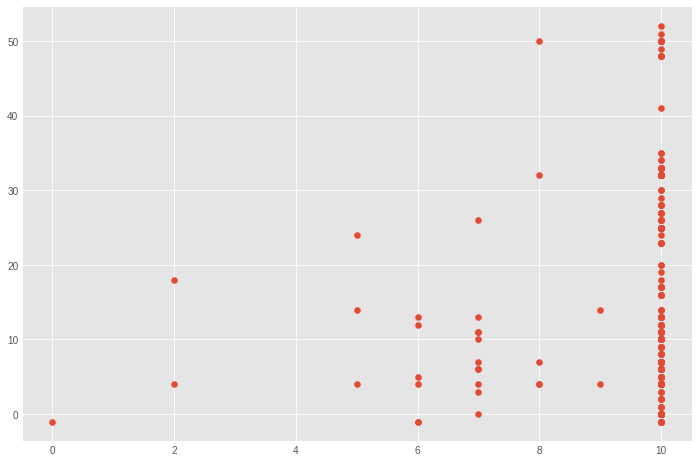

In [45]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
plt.scatter(graded_scores, cost_array)
# plt.scatter(graded_scores, cost_array)

In [37]:
# docs on clara, intepreter, how to hack around
# compare with pyCFG, neural network approach
# see how easy to feed pyCFG to graph2VEC
# combine feedbacks